In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time


In [2]:

def corr_no_interpolation(y1,y2, window_size):
    corr = np.absolute(np.correlate(y1[0,:], y2[0,:], "full"))
    delay = np.argmax(corr)
    return corr, delay

    
def corr_spline_interpolation(y1,y2, window_size):
    y1 = np.array([y1])
    y2 = np.array([y2])
    corr, delay = corr_no_interpolation(y1,y2, window_size)
    if window_size%2!=0:
        window_interp = np.arange(delay-(window_size-1)/2,delay+(window_size-1)/2)
    else:
        window_interp = np.arange(delay-(window_size)/2,delay+(window_size)/2-1)
    
    tck = interpolate.splrep(window_interp, corr[window_interp.astype(np.int)], s=0, k=4)
    dspl = interpolate.splder(tck)
    delay_spl = interpolate.sproot(dspl, mest = 20)
    if len(delay_spl) > 1: 
        delay = delay_spl[np.argmax(interpolate.splev(delay_spl, tck, der=0))]
    else:
        delay = delay_spl[0]
    return corr, delay-len(y1[0,:])+1


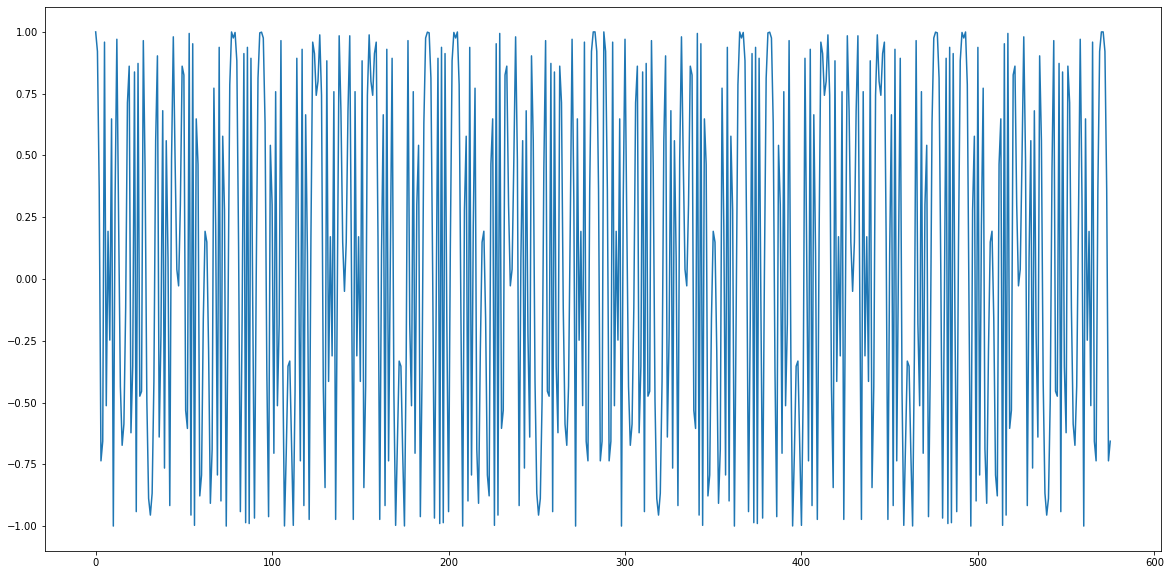

576


In [3]:
refer = np.fromfile("refer.dat", np.complex64)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

# refer = refer[:M_sc:]
# refer = refer[M_sc:]
# M_sc //= 2

plt.plot(refer.real)
plt.show()
M_sc = refer.shape[0]
print(M_sc)
M_sc //= 2
refer = refer[:M_sc:]

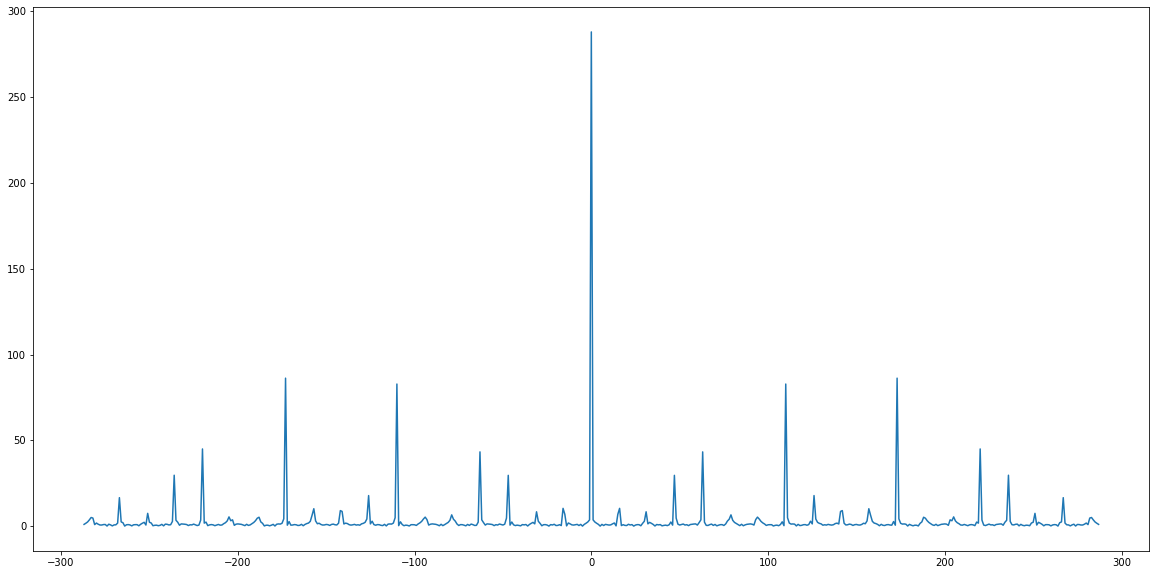

0


In [4]:
corr = np.absolute(np.correlate(refer[:M_sc], refer[:M_sc], "full")) # peak's x is delay
x = np.arange(-M_sc+1, M_sc)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(x, corr)
plt.show()
print(corr.argmax()-M_sc+1)

500.0


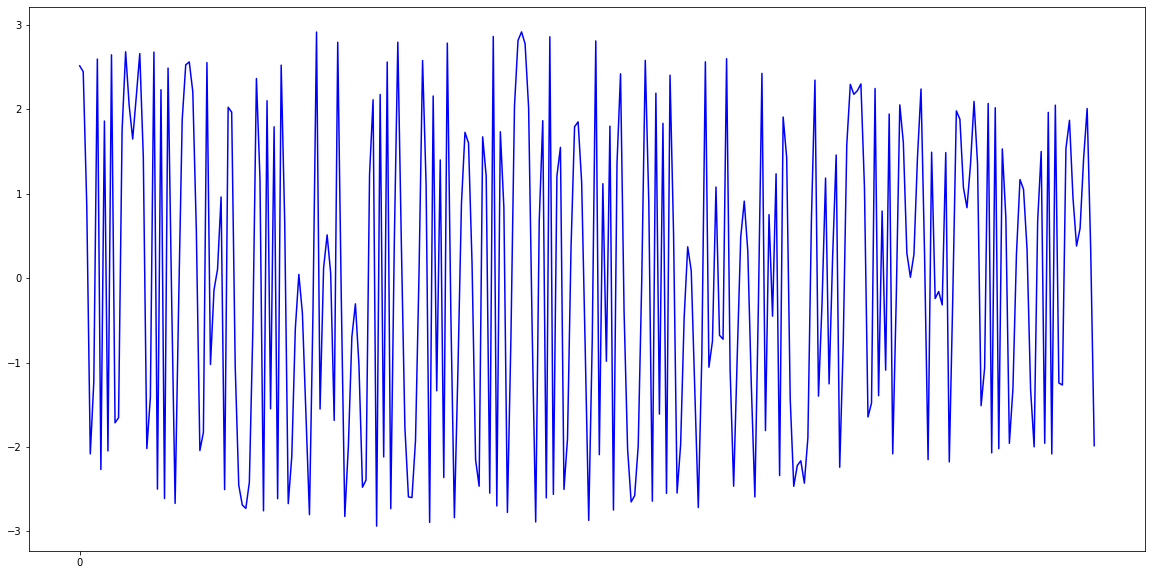

In [5]:
# NOTE: For USRP B210, has 100 samples advance, eliminate in configs
arr = np.fromfile("test.dat", np.complex64)
print(arr.shape[0]/M_sc)
i = 10
length = 1
recv = arr[M_sc*i:M_sc*(i+length)]

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(np.arange(0, recv.shape[0])/M_sc, recv.real, 'b')
# plt.plot(np.arange(0, recv.shape[0])/288, refer.real, 'g')
plt.xticks(np.arange(0, recv.shape[0], M_sc)/M_sc)
plt.show()

500.0


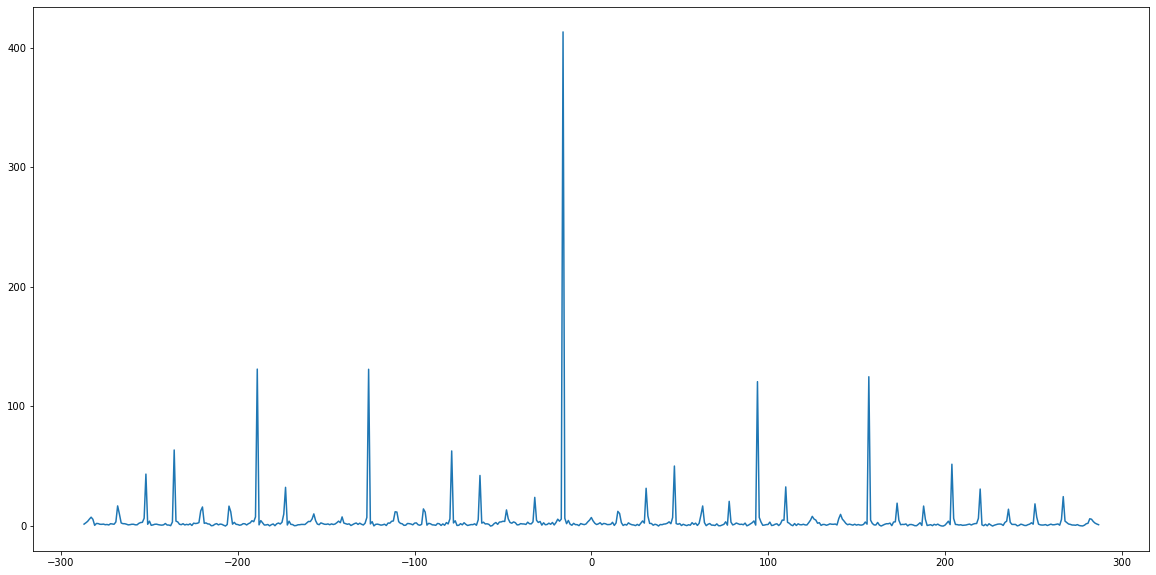

-16


In [6]:
# NOTE: For USRP B210, has 100 samples advance, eliminate in configs
arr = np.fromfile("test.dat", np.complex64)
print(arr.shape[0]/M_sc)
i = 50
length = 1
recv = arr[M_sc*i:M_sc*(i+length)]

corr = np.absolute(np.correlate(recv, refer, "full")) # peak's x is delay
x = np.arange(-M_sc+1, M_sc)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(x, corr)
plt.savefig("corr_packet{}.png".format(i))
plt.show()
print(corr.argmax()-M_sc+1)


In [16]:
arr = np.fromfile("test0.dat", np.complex64)
print(arr.shape[0]/M_sc)
size = arr.shape[0]//M_sc
delay = []

for i in range(5, 450):
    length = 1
    recv = arr[M_sc*i:M_sc*(i+length)]

    corr = np.absolute(np.correlate(recv, refer, "full")) # peak's x is delay
    delay.append(corr.argmax()-M_sc+1) 

delay_arr = np.asarray(delay)
print(delay_arr.shape[0], delay_arr.mean())
plt.plot(delay_arr)

: 

: 

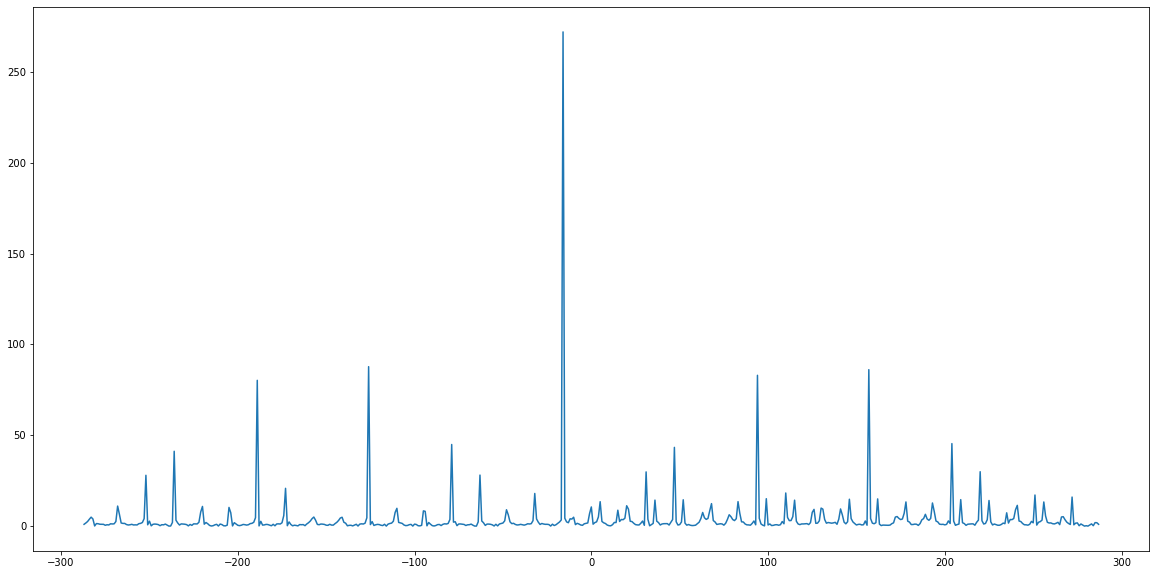

-16


In [12]:
# shift = -272
shift = 16
recv = np.concatenate([refer[shift:], refer[:shift]])
corr = np.absolute(np.correlate(recv, refer, "full")) # peak's x is delay

x = np.arange(-M_sc+1, M_sc)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(x, corr)
# plt.savefig("corr_packet{}.png".format(i))
plt.show()
print(corr.argmax()-M_sc+1)


In [13]:
shift = -272
recv = np.concatenate([refer[shift:], refer[:shift]])
corr1 = np.absolute(np.correlate(recv, refer, "full")) # peak's x is delay

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,